In [114]:
#auto-complete
%config Completer.use_jedi = False

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
%cd /content/drive/My Drive/Colab Notebooks
!ls

/content/drive/My Drive/Colab Notebooks
baseline_trained  ComputerVision4243  cs4243_smallest


In [117]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

img_height = 180
img_width = 180
image_size = (img_height, img_width)
batch_size = 16

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/My Drive/Colab Notebooks/cs4243_smallest/",
    labels='inferred',
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/My Drive/Colab Notebooks/cs4243_smallest/",
    labels='inferred',
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

whole_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/My Drive/Colab Notebooks/cs4243_smallest/",
    labels='inferred',
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
print(type(val_ds))
class_names = train_ds.class_names
print(class_names)

Found 1757 files belonging to 3 classes.
Using 1406 files for training.
Found 1757 files belonging to 3 classes.
Using 351 files for validation.
Found 1757 files belonging to 3 classes.
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
['carrying', 'normal', 'threat']


(16, 180, 180, 3)
(16,)


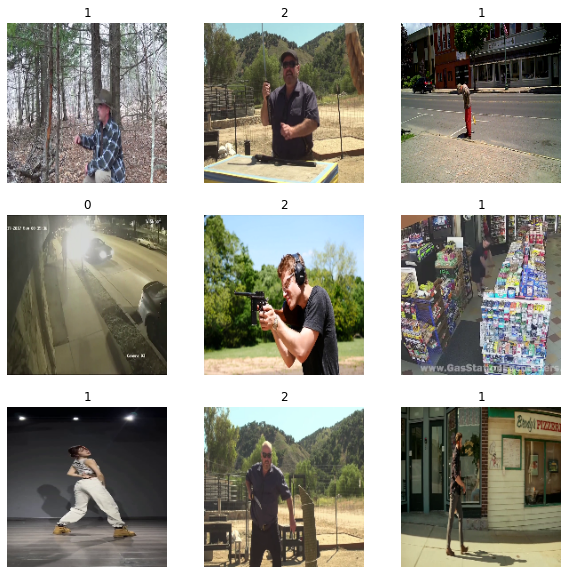

In [118]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    print(images.shape)
    print(labels.shape)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [119]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

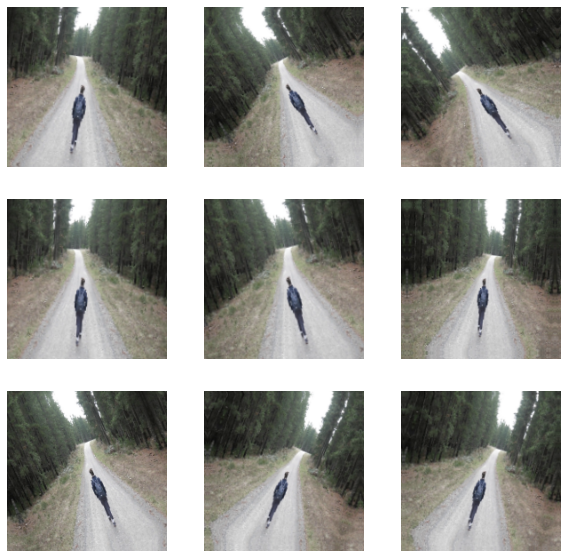

In [120]:
# showing the rotated and flipped images that were added to the 
# original dataset
#
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


In [121]:

# #Configure the dataset for performance
# augmented_train_ds = train_ds.map( lambda x, y: (data_augmentation(x, training=True), y))
# augmented_val_ds = val_ds.map( lambda x, y: (data_augmentation(x, training=True), y))

# augmented_train_ds = augmented_train_ds.prefetch(buffer_size=32)
# augmented_val_ds = augmented_val_ds.prefetch(buffer_size=32)

train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

In [122]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

Please install GPU version of TF


In [ ]:
#standardization

In [123]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [125]:
#opimizer
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [126]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

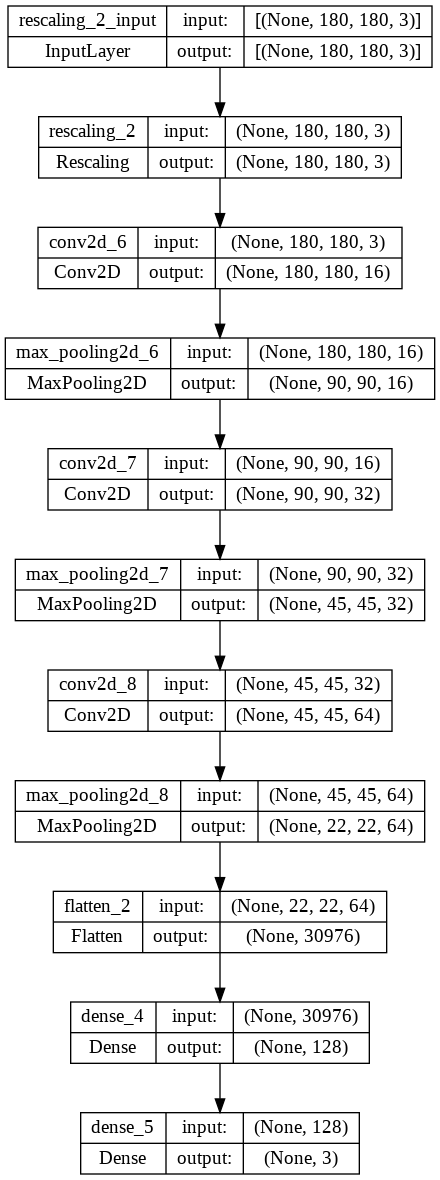

In [131]:
keras.utils.plot_model(model, show_shapes=True)

In [127]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
88/88 [==============================] - 294s 3s/step - loss: 1.0242 - accuracy: 0.5178 - val_loss: 0.9392 - val_accuracy: 0.5470
Epoch 2/10
88/88 [==============================] - 113s 1s/step - loss: 0.8886 - accuracy: 0.5960 - val_loss: 0.8746 - val_accuracy: 0.6553
Epoch 3/10
88/88 [==============================] - 112s 1s/step - loss: 0.6399 - accuracy: 0.7390 - val_loss: 0.8331 - val_accuracy: 0.6781
Epoch 4/10
88/88 [==============================] - 112s 1s/step - loss: 0.3999 - accuracy: 0.8521 - val_loss: 0.9131 - val_accuracy: 0.6923
Epoch 5/10
88/88 [==============================] - 118s 1s/step - loss: 0.1762 - accuracy: 0.9424 - val_loss: 1.3555 - val_accuracy: 0.7236
Epoch 6/10
88/88 [==============================] - 112s 1s/step - loss: 0.1148 - accuracy: 0.9616 - val_loss: 1.1894 - val_accuracy: 0.7379
Epoch 7/10
88/88 [==============================] - 112s 1s/step - loss: 0.0721 - accuracy: 0.9815 - val_loss: 1.6145 - val_accuracy: 0.7151
Epoch 8/10
88

In [128]:
model.save('baseline_trained')

In [129]:
print(model)

In [132]:
import os
import numpy as np
from os import listdir
# make confution matrix
confution_matrix = np.zeros((3,3), dtype=int)


# get the path/directory
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/baseline_trained')
predictions = model.predict(whole_ds)

110/110 [==============================] - 100s 810ms/step


In [133]:
predictions.shape

(1757, 3)

In [136]:
# if already 0-2, then this part no need
predicted_class = np.argmax(predictions, axis=1)
print(predicted_class)
print(np.min(predicted_class))
print(np.max(predicted_class))

[1 1 0 ... 1 2 0]
0
2


In [137]:
labeled_class = np.concatenate([label for img, label in whole_ds], axis = 0)#bacause labels form dataset are 1-3 so need to -1

In [138]:
print(np.min(labeled_class))
print(np.max(labeled_class))

0
2


In [139]:
print(labeled_class)

[2 2 1 ... 1 1 1]


In [140]:
# confusion matrix
# https://www.tensorflow.org/api_docs/python/tf/math/confusion_matrix
# confusion_matrix(labels, predictions)
# The rows of the matrix represent the labels
# tf.math.confusion_matrix(labeled_class, predicted_class)

confusion_matrix = tf.math.confusion_matrix(
    labeled_class,
    predicted_class,
    num_classes=3,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)

In [141]:
print(confusion_matrix)

tf.Tensor(
[[ 50 165 101]
 [172 484 281]
 [ 78 295 131]], shape=(3, 3), dtype=int32)


In [142]:
print("correct 0 percentage is:", 100* confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]+confusion_matrix[2][0]))
print("correct 1 percentage is:", 100* confusion_matrix[1][1]/(confusion_matrix[0][1]+confusion_matrix[1][1]+confusion_matrix[2][1]))
print("correct 2 percentage is:", 100* confusion_matrix[2][2]/(confusion_matrix[0][2]+confusion_matrix[1][2]+confusion_matrix[2][2]))

correct 0 percentage is: tf.Tensor(16.666666666666668, shape=(), dtype=float64)
correct 1 percentage is: tf.Tensor(51.271186440677965, shape=(), dtype=float64)
correct 2 percentage is: tf.Tensor(25.536062378167642, shape=(), dtype=float64)
